In [16]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 风格
plt.style.use('seaborn-whitegrid')

# 全局设置
config = {'font.family':'Times New Roman', 'figure.dpi':300, 'figure.figsize':(10,8), 'axes.labelsize':15, 'axes.titlesize':15}
plt.rcParams.update(config)

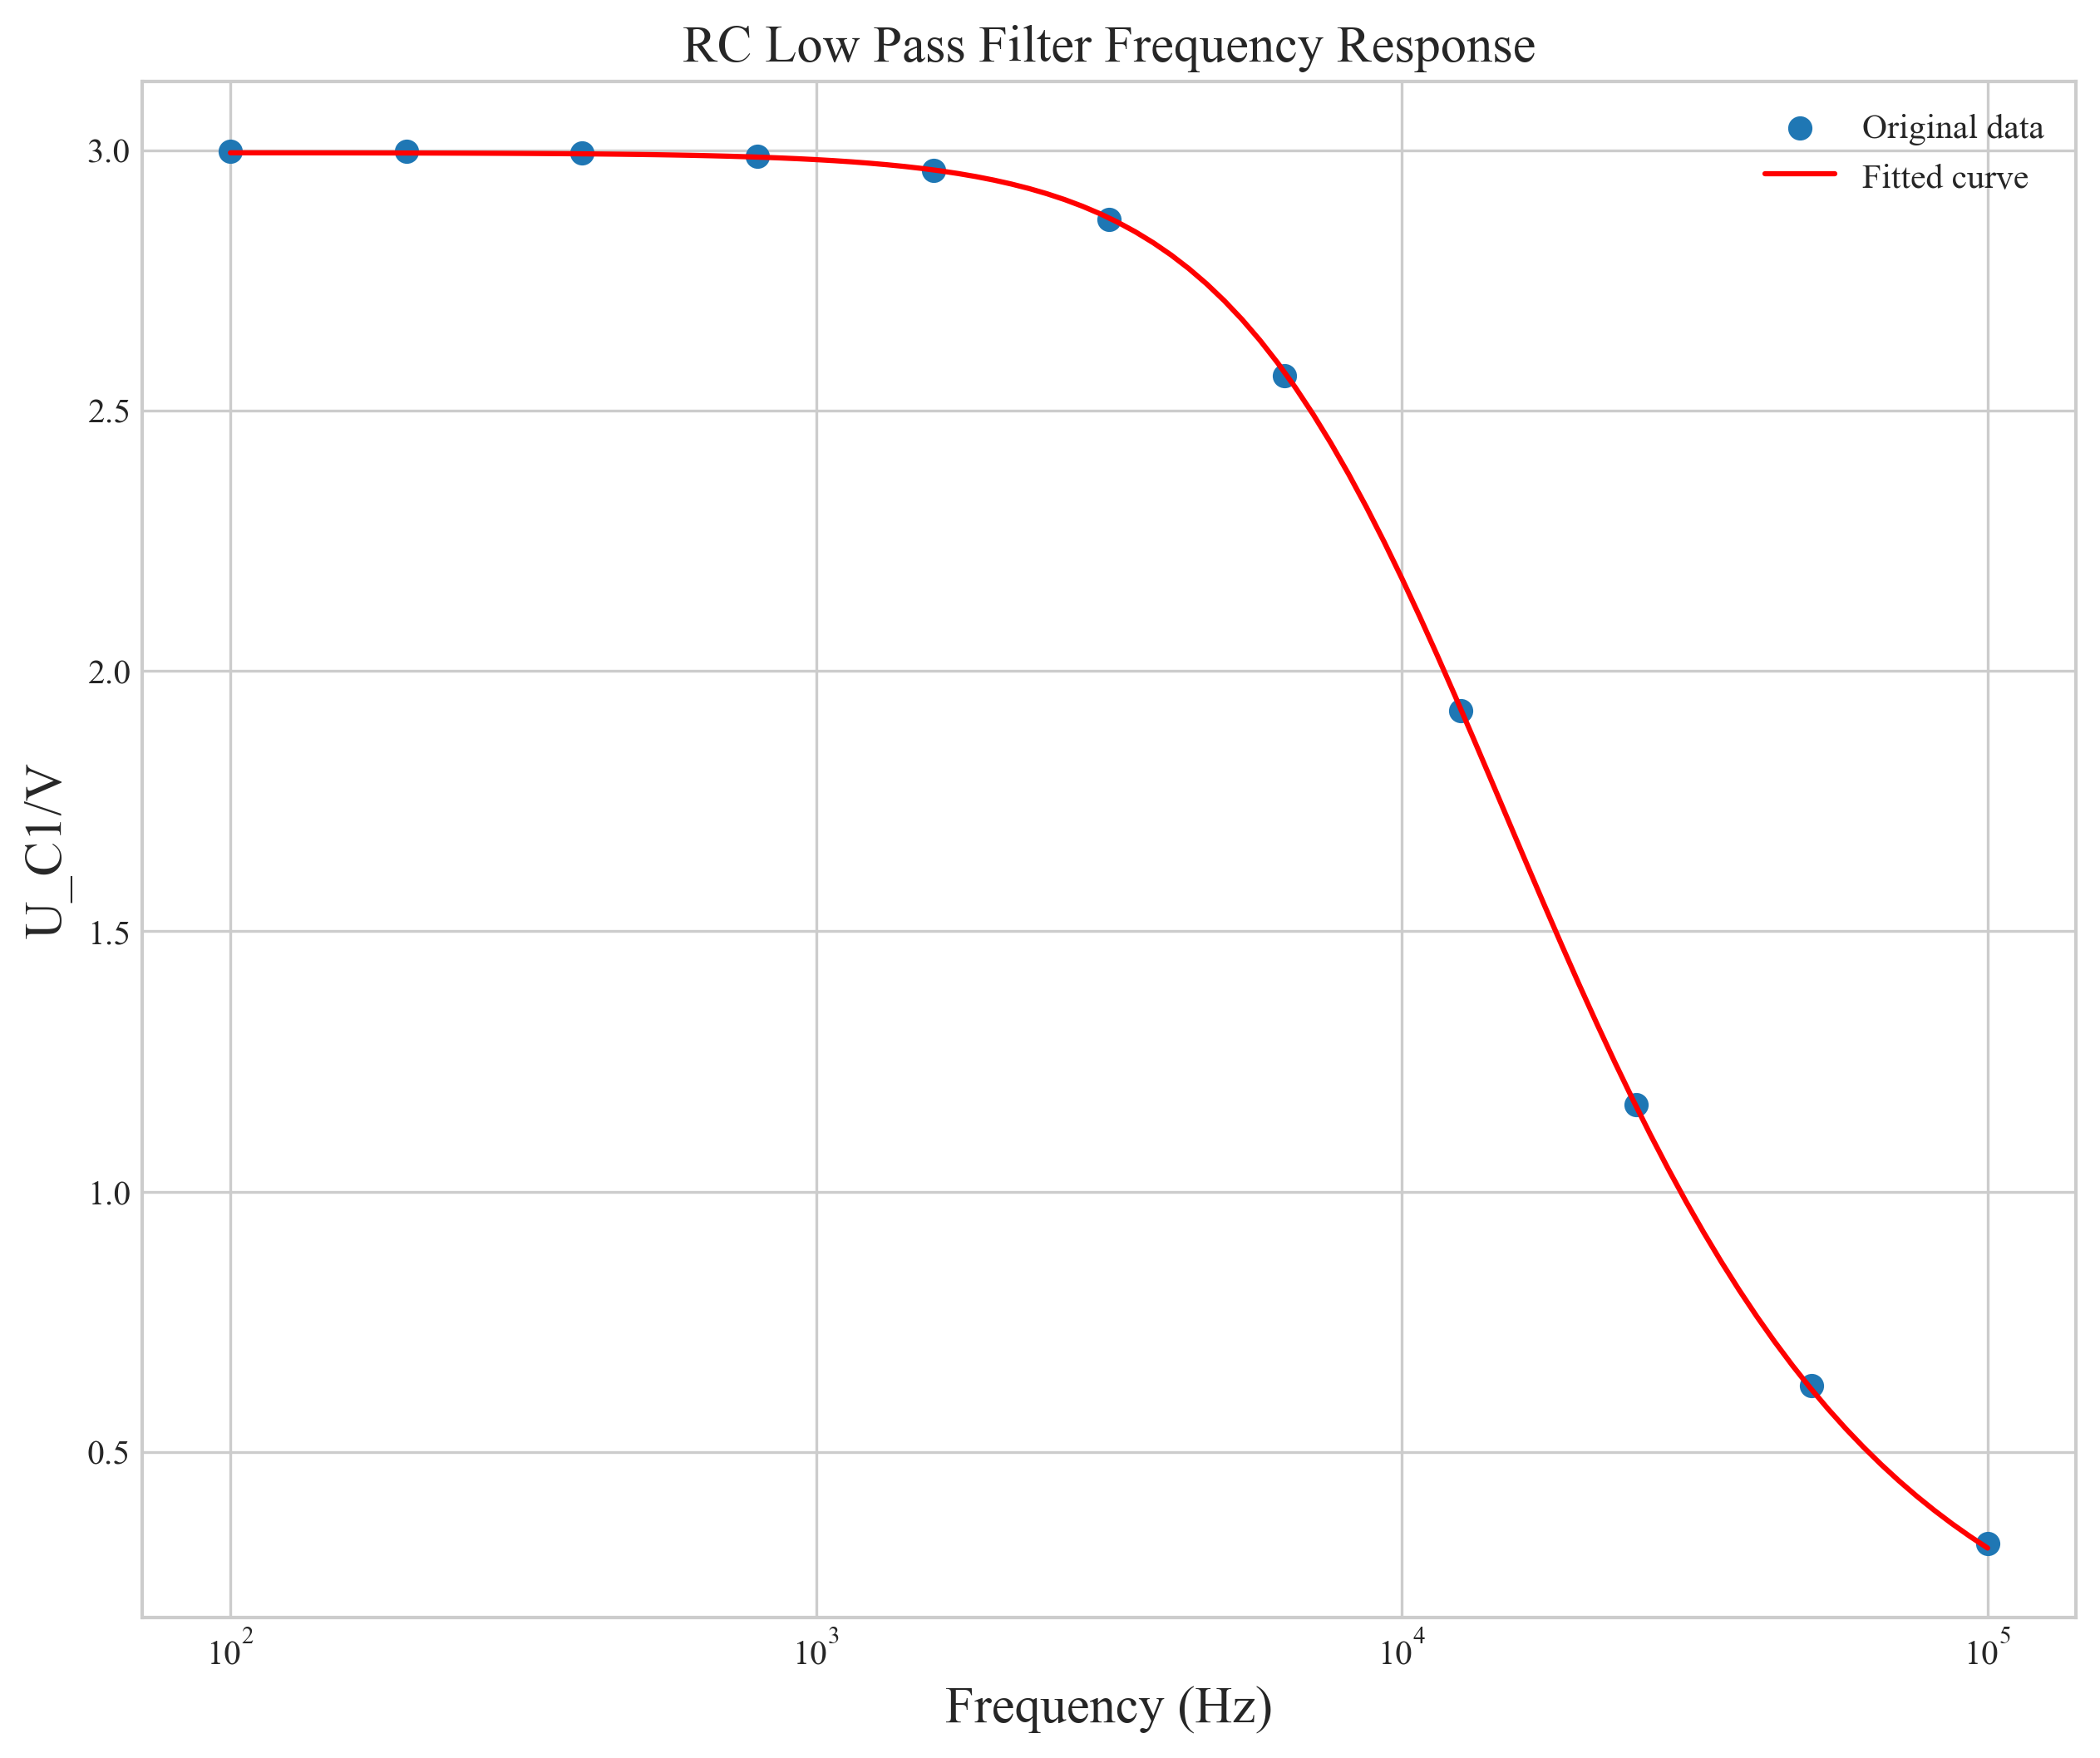

拟合参数 (u, rc): [ 2.99488701e+00 -1.50285449e-05]


In [17]:

# 输入数据
lg_f = np.array([2, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5])
U_C1 = np.array([2.997, 2.997, 2.995, 2.988, 2.961, 2.867, 2.566, 1.923, 1.167, 0.627, 0.324])

# RC低通滤波器的频率响应函数
def rc_filter_freq_response(f, u, rc):
    return u / np.sqrt(1 + (2 * np.pi * f * rc)**2)

# 进行拟合
popt, pcov = curve_fit(rc_filter_freq_response, 10**lg_f, U_C1)

# 生成拟合曲线的x值
x_fit = np.logspace(min(lg_f), max(lg_f), 100, base=10)

# 计算拟合曲线的y值
y_fit = rc_filter_freq_response(x_fit, *popt)

# 绘制原始数据和拟合曲线
plt.scatter(10**lg_f, U_C1, label='Original data')
plt.plot(x_fit, y_fit, 'r', label='Fitted curve')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('U_C1/V')
plt.title('RC Low Pass Filter Frequency Response')
plt.legend()
plt.grid(True)
plt.show()

# 输出拟合参数
print("拟合参数 (u, rc):", popt)


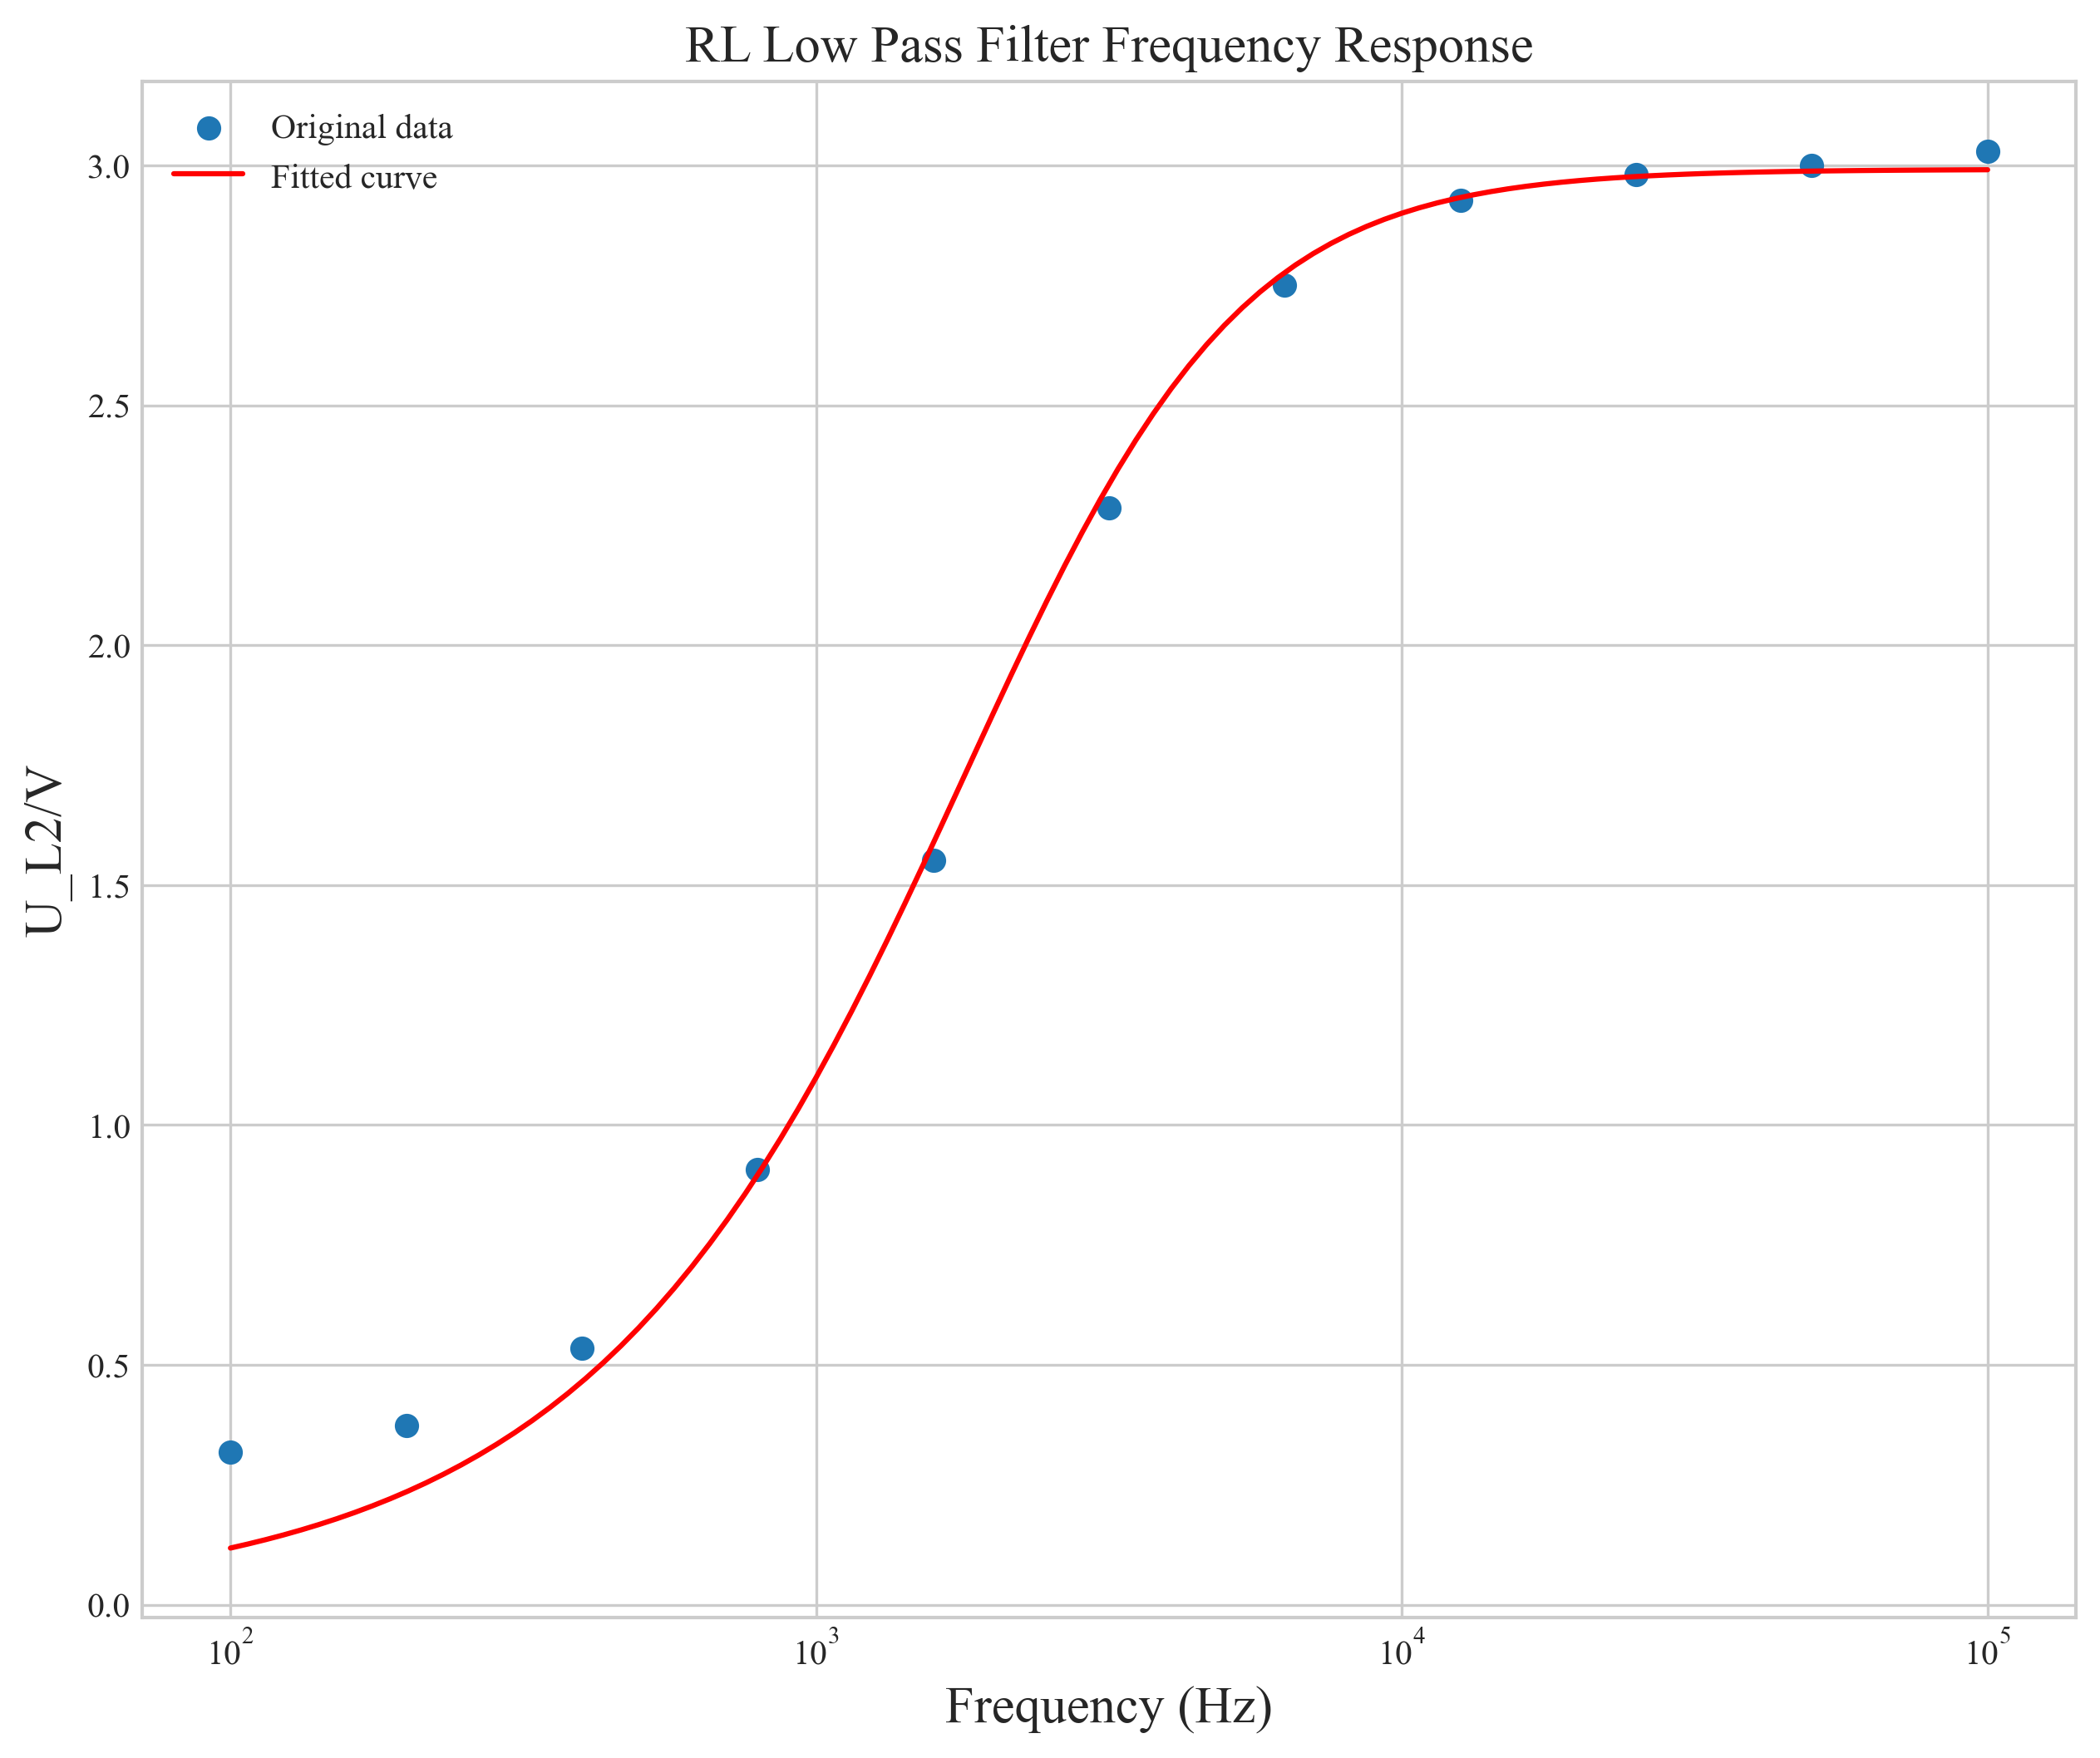

拟合参数 (u, r/l): [2.99220096e+00 1.59077822e+04]


In [18]:
# 输入数据
U_L2 = np.array([0.318, 0.373, 0.535, 0.907, 1.552, 2.286, 2.75, 2.928, 2.982, 3.001, 3.029])

# RL串联电路的频率响应函数
def rl_filter_freq_response(f, u, rl):
    return u * 2 * np.pi * f / np.sqrt((2 * np.pi * f)**2 + rl**2)

# 进行拟合
popt, pcov = curve_fit(rl_filter_freq_response, 10**lg_f, U_L2)

# 生成拟合曲线的x值
x_fit = np.logspace(min(lg_f), max(lg_f), 100, base=10)

# 计算拟合曲线的y值
y_fit = rl_filter_freq_response(x_fit, *popt)

# 绘制原始数据和拟合曲线
plt.scatter(10**lg_f, U_L2, label='Original data')
plt.plot(x_fit, y_fit, 'r', label='Fitted curve')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('U_L2/V')
plt.title('RL Low Pass Filter Frequency Response')
plt.legend()
plt.grid(True)
plt.show()

# 输出拟合参数
print("拟合参数 (u, r/l):", popt)

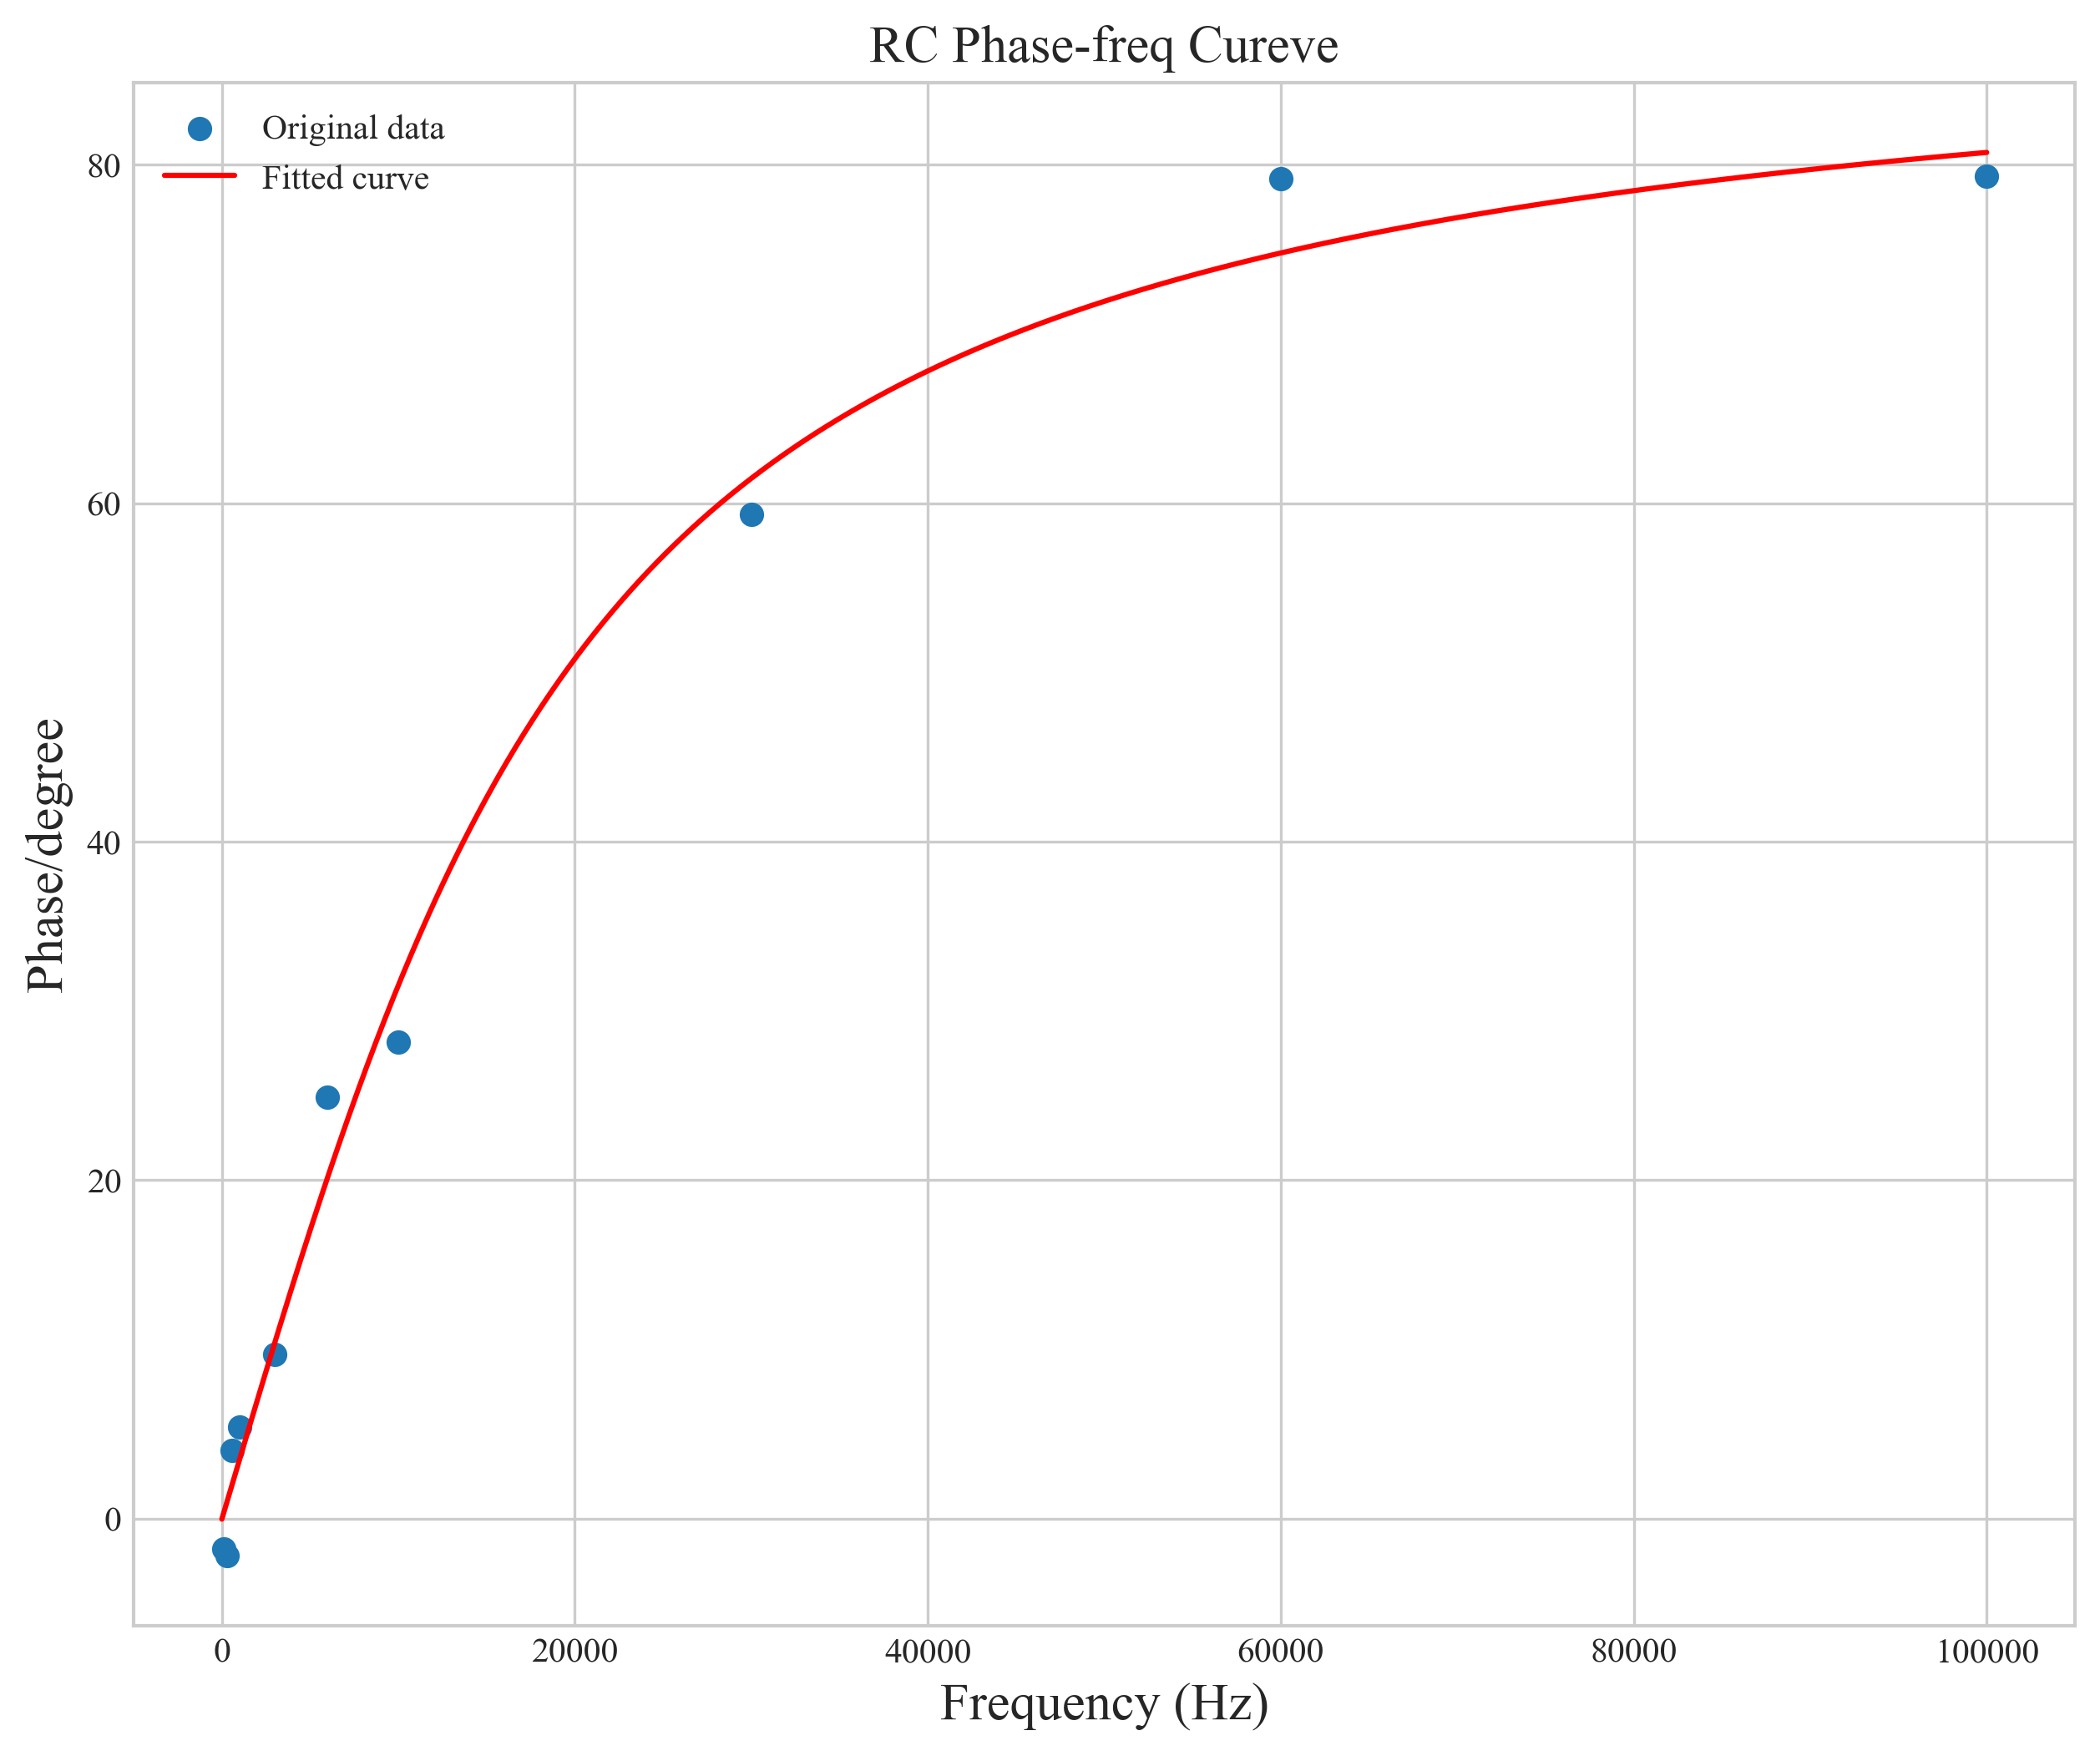

拟合参数 (u, r/l): [ 9.76673512e-06 -2.26980705e-02]


In [19]:
# 输入数据
f2 = np.array([100, 300, 600, 1000, 3000, 6000, 10000, 30000, 60000, 100000])
phi2 = np.array([-1.8, -2.156, 4.046, 5.4, 9.7, 24.91, 28.14, 59.33, 79.15, 79.3])

# 拟合函数
def rc_phase_freq(f, rc, bias):
    w0 = 1 / rc
    w = 2 * np.pi * f
    return 180 * np.arctan(w / w0) / np.pi + bias

# 进行拟合
popt, pcov = curve_fit(rc_phase_freq, f2, phi2)

# 生成拟合曲线的x值
#x_fit = np.logspace(min(lg_f), max(lg_f), 100, base=10)
x_fit = np.linspace(0, 100000, 1000)

# 计算拟合曲线的y值
y_fit = rc_phase_freq(x_fit, *popt)

# 绘制原始数据和拟合曲线
plt.scatter(f2, phi2, label='Original data')
plt.plot(x_fit, y_fit, 'r', label='Fitted curve')
#plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase/degree')
plt.title('RC Phase-freq Cureve')
plt.legend()
plt.grid(True)
plt.show()

# 输出拟合参数
print("拟合参数 (u, r/l):", popt)